Goal: Plot Saratoga County's 2017 and 2018 average temperatures compared to Saratoga's overall average temperature

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

Import Saratoga yearly temperatures

In [2]:
saratoga_temp_ppt=pd.read_csv('datasets/PRISM saratoga precip and mean temp since 1895 CSV.csv',delimiter=',')
saratoga_temp_ppt_df = pd.DataFrame(saratoga_temp_ppt)
saratoga_temp_ppt_df.columns = saratoga_temp_ppt_df.iloc[9]
saratoga_temp_ppt_df = saratoga_temp_ppt_df[10:]
saratoga_temp_ppt_df = saratoga_temp_ppt_df.reset_index(drop=True)
saratoga_temp_ppt_df.head()

9,Date,ppt (inches),tmean (degrees F)
0,1895,36.73,45.1
1,1896,40.62,45.1
2,1897,48.7,45.2
3,1898,46.68,47.1
4,1899,37.69,45.7


Convert values to integers

In [3]:
saratoga_temp_ppt_df['Date'] = pd.to_numeric(saratoga_temp_ppt_df['Date'])
saratoga_temp_ppt_df['ppt (inches)'] = pd.to_numeric(saratoga_temp_ppt_df['ppt (inches)'])
saratoga_temp_ppt_df['tmean (degrees F)'] = pd.to_numeric(saratoga_temp_ppt_df['tmean (degrees F)'])

Import Saratoga monthly temperatures

In [4]:
saratoga_temp_ppt_2000=pd.read_csv('datasets/PRISM Saratoga 18952017 mean temp MONTHLY CSV.csv',delimiter=',')
saratoga_temp_ppt_2000_df = pd.DataFrame(saratoga_temp_ppt_2000)
saratoga_temp_ppt_2000_df.columns = saratoga_temp_ppt_2000_df.iloc[9]
saratoga_temp_ppt_2000_df = saratoga_temp_ppt_2000_df[10:]
saratoga_temp_ppt_2000_df = saratoga_temp_ppt_2000_df.reset_index(drop=True)
saratoga_temp_ppt_2000_df.tail()

9,Date,tmean (degrees F)
1483,2018-08,72.3
1484,2018-09,64.7
1485,2018-10,48.1
1486,2018-11,33.7
1487,2018-12,27.9


In [5]:
saratoga_temp_ppt_2000_df['tmean (degrees F)'] = pd.to_numeric(saratoga_temp_ppt_2000_df['tmean (degrees F)'])

Split YYYY-MM date column into two columns to contain YYYY & MM

In [6]:
date_split = saratoga_temp_ppt_2000_df["Date"].str.split("-", n = 1, expand = True) 
saratoga_temp_ppt_2000_df["Year"]= date_split[0] 
saratoga_temp_ppt_2000_df["Month"]= date_split[1] 
saratoga_temp_ppt_2000_df.drop(columns=["Date"], inplace = True) 
#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
saratoga_temp_ppt_2000_df.head()

9,tmean (degrees F),Year,Month
0,18.8,1895,01
1,16.4,1895,02
2,27.0,1895,03
3,45.8,1895,04
4,60.9,1895,05


Rename columns

In [7]:
saratoga_temp_ppt_2000_df.columns = ['tempmeanF','Year','Month']
saratoga_temp_ppt_2000_df.tail()

,tempmeanF,Year,Month
1483,72.3,2018,08
1484,64.7,2018,09
1485,48.1,2018,10
1486,33.7,2018,11
1487,27.9,2018,12


Need to find 30-year normal (average) temperature of Saratoga County. 
* Sorted year column by date range of previous 30 years

In [8]:
saratoga_temp_ppt_1993_df = saratoga_temp_ppt_2000_df[((saratoga_temp_ppt_2000_df.Year > "1986") & (saratoga_temp_ppt_2000_df.Year < "2019"))]
saratoga_temp_ppt_1993_df.head()

,tempmeanF,Year,Month
1104,19.3,1987,01
1105,18.8,1987,02
1106,34.7,1987,03
1107,48.4,1987,04
1108,58.0,1987,05


Find average temperature of each month for previous 30 years. Store averages in separate lists by month. Create new dataframe of 30-year average temperatures by month.

In [9]:
temp_mean_overall = []
Jan1_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='01'].tempmeanF.mean()
Feb2_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='02'].tempmeanF.mean()
Mar3_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='03'].tempmeanF.mean()
Apr4_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='04'].tempmeanF.mean()
May5_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='05'].tempmeanF.mean()
Jun6_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='06'].tempmeanF.mean()
Jul7_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='07'].tempmeanF.mean()
Aug8_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='08'].tempmeanF.mean()
Sept9_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='09'].tempmeanF.mean()
Oct_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='10'].tempmeanF.mean()
Nov_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='11'].tempmeanF.mean()
Dec_mean = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Month=='12'].tempmeanF.mean()

temp_mean_overall.append(Jan1_mean)
temp_mean_overall.append(Feb2_mean)
temp_mean_overall.append(Mar3_mean)
temp_mean_overall.append(Apr4_mean)
temp_mean_overall.append(May5_mean)
temp_mean_overall.append(Jun6_mean)
temp_mean_overall.append(Jul7_mean)
temp_mean_overall.append(Aug8_mean)
temp_mean_overall.append(Sept9_mean)
temp_mean_overall.append(Oct_mean)
temp_mean_overall.append(Nov_mean)
temp_mean_overall.append(Dec_mean)
temp_mean_overall
Monthslist =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
#temp_mean_overall_dict = [{'Overall Temps':temp_mean_overall,
#                           'Months':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']}]
#temp_mean_df = pd.DataFrame(temp_mean_overall_dict)
#temp_mean_df
#temp_mean_overall_dict = [{'Overall Temps':temp_mean_overall}]
#temp_mean_df = pd.DataFrame(temp_mean_overall_dict)
#temp_mean_df
df_temp=pd.DataFrame(temp_mean_overall,columns=['Overall_MeanTemp'])
df_temp['Month'] = Monthslist
#df_temp['Ppt'] = ppt_mean_overall
#df_temp=df.append({'Months':months_list}, ignore_index=True)
df_temp
#The chart is Saratoga mean temp and ppt from 1895-2017

,Overall_MeanTemp,Month
0,21.140625,Jan
1,23.178125,Feb
2,32.309375,Mar
3,45.450000,Apr
4,57.543750,May
5,65.840625,Jun
6,70.259375,Jul
7,68.543750,Aug
8,61.037500,Sept
9,49.312500,Oct


Create dataframe to store current average temperatures for each month for year of 2018.

In [10]:
dr_currentyear = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Year=="2018"]
dr_currentyear.reset_index(inplace = True) 
dr_currentyear

,index,tempmeanF,Year,Month
0,1476,19.1,2018,01
1,1477,28.5,2018,02
2,1478,32.0,2018,03
3,1479,39.4,2018,04
4,1480,61.8,2018,05
5,1481,64.8,2018,06
6,1482,73.3,2018,07
7,1483,72.3,2018,08
8,1484,64.7,2018,09
9,1485,48.1,2018,10


Plot 2018 temp averages and 30-year average temp of county using scatter plot. 

<IPython.core.display.Javascript object>


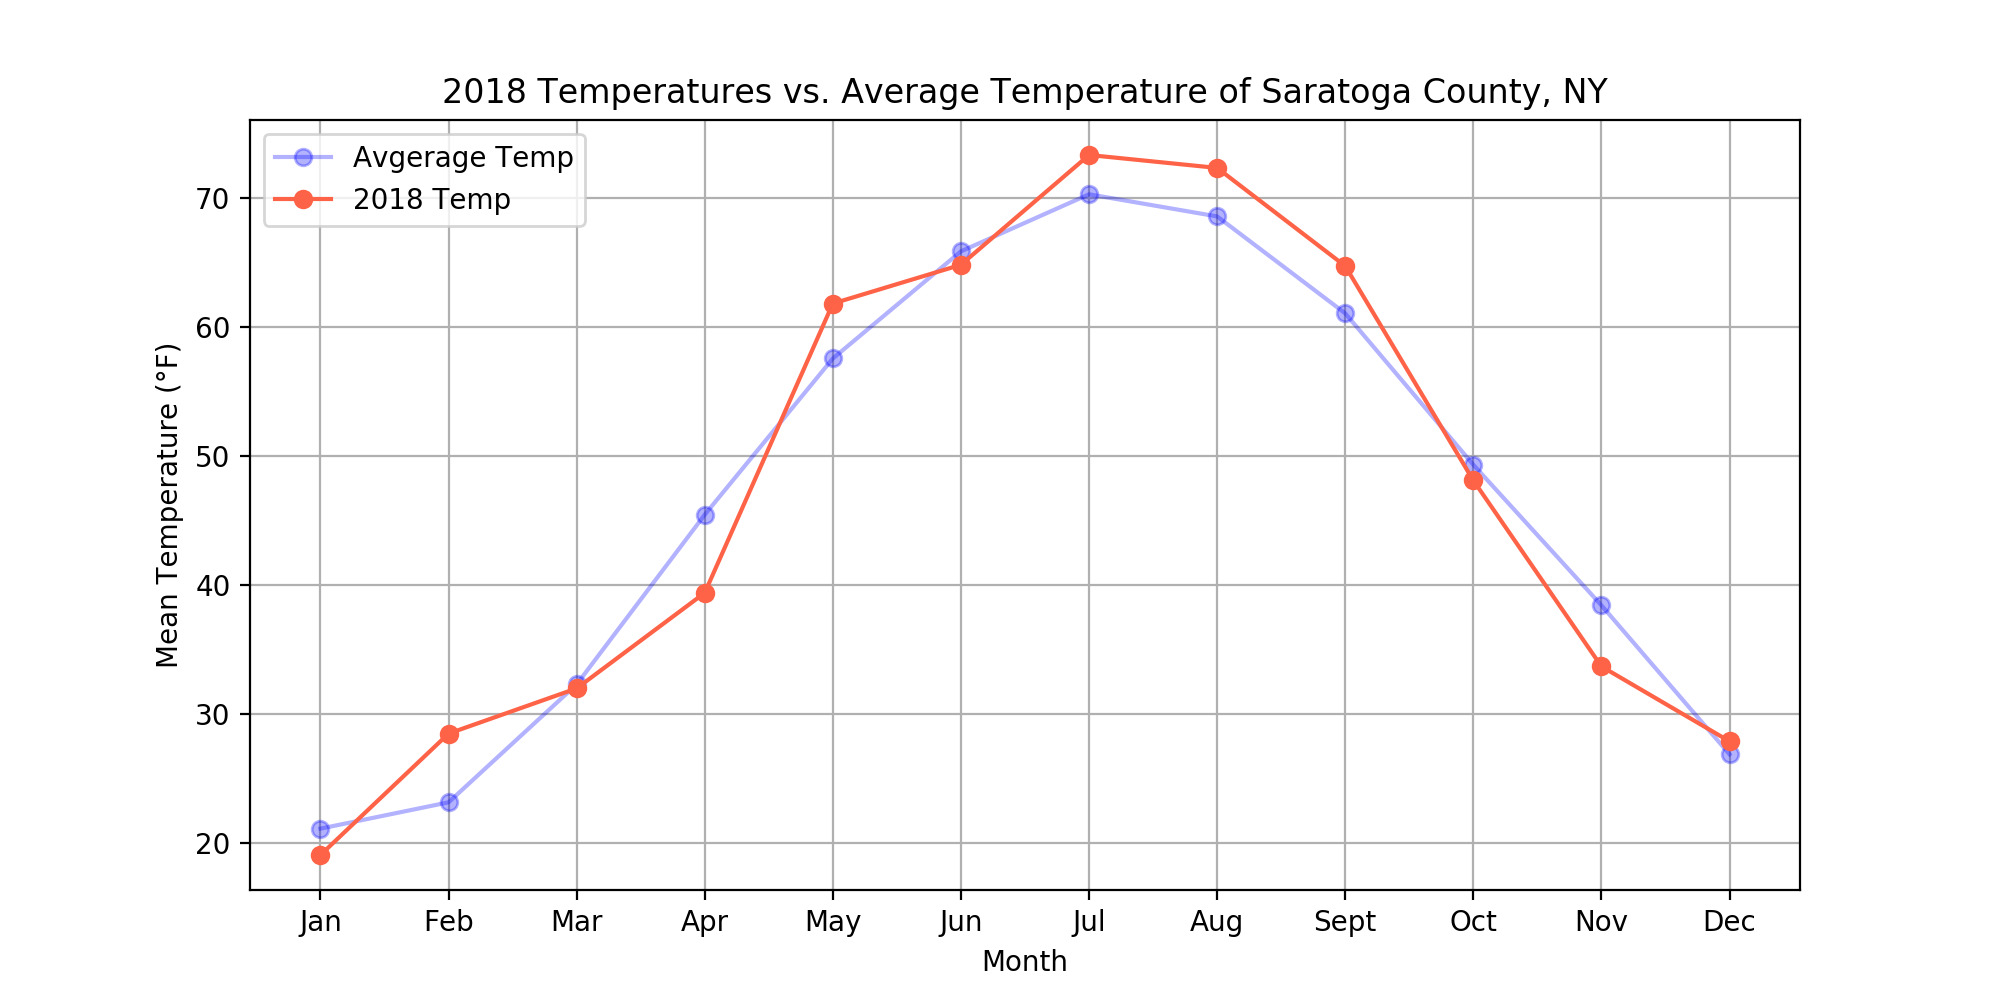

In [11]:
x3=df_temp['Month']
y3=df_temp['Overall_MeanTemp']
y4=dr_currentyear['tempmeanF']
fig = plt.figure(figsize=(10,5))

plt.plot(x3, y3,'b',marker='o',label="Avgerage Temp",alpha = .3)
plt.plot(x3, y4,'tomato',marker='o', label="2018 Temp")
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°F)')
plt.title('2018 Temperatures vs. Average Temperature of Saratoga County, NY')
plt.subplots_adjust(top=.88)
plt.grid(True)
plt.savefig('Charts/Saratoga_Avg_vs_2018_temps-LIVE.png')
plt.show()
#End growing season (last harvest) Oct/Nov
#20 year increments

Plot 2017 temp averages and 30-year average temp of county using scatter plot. 

<IPython.core.display.Javascript object>


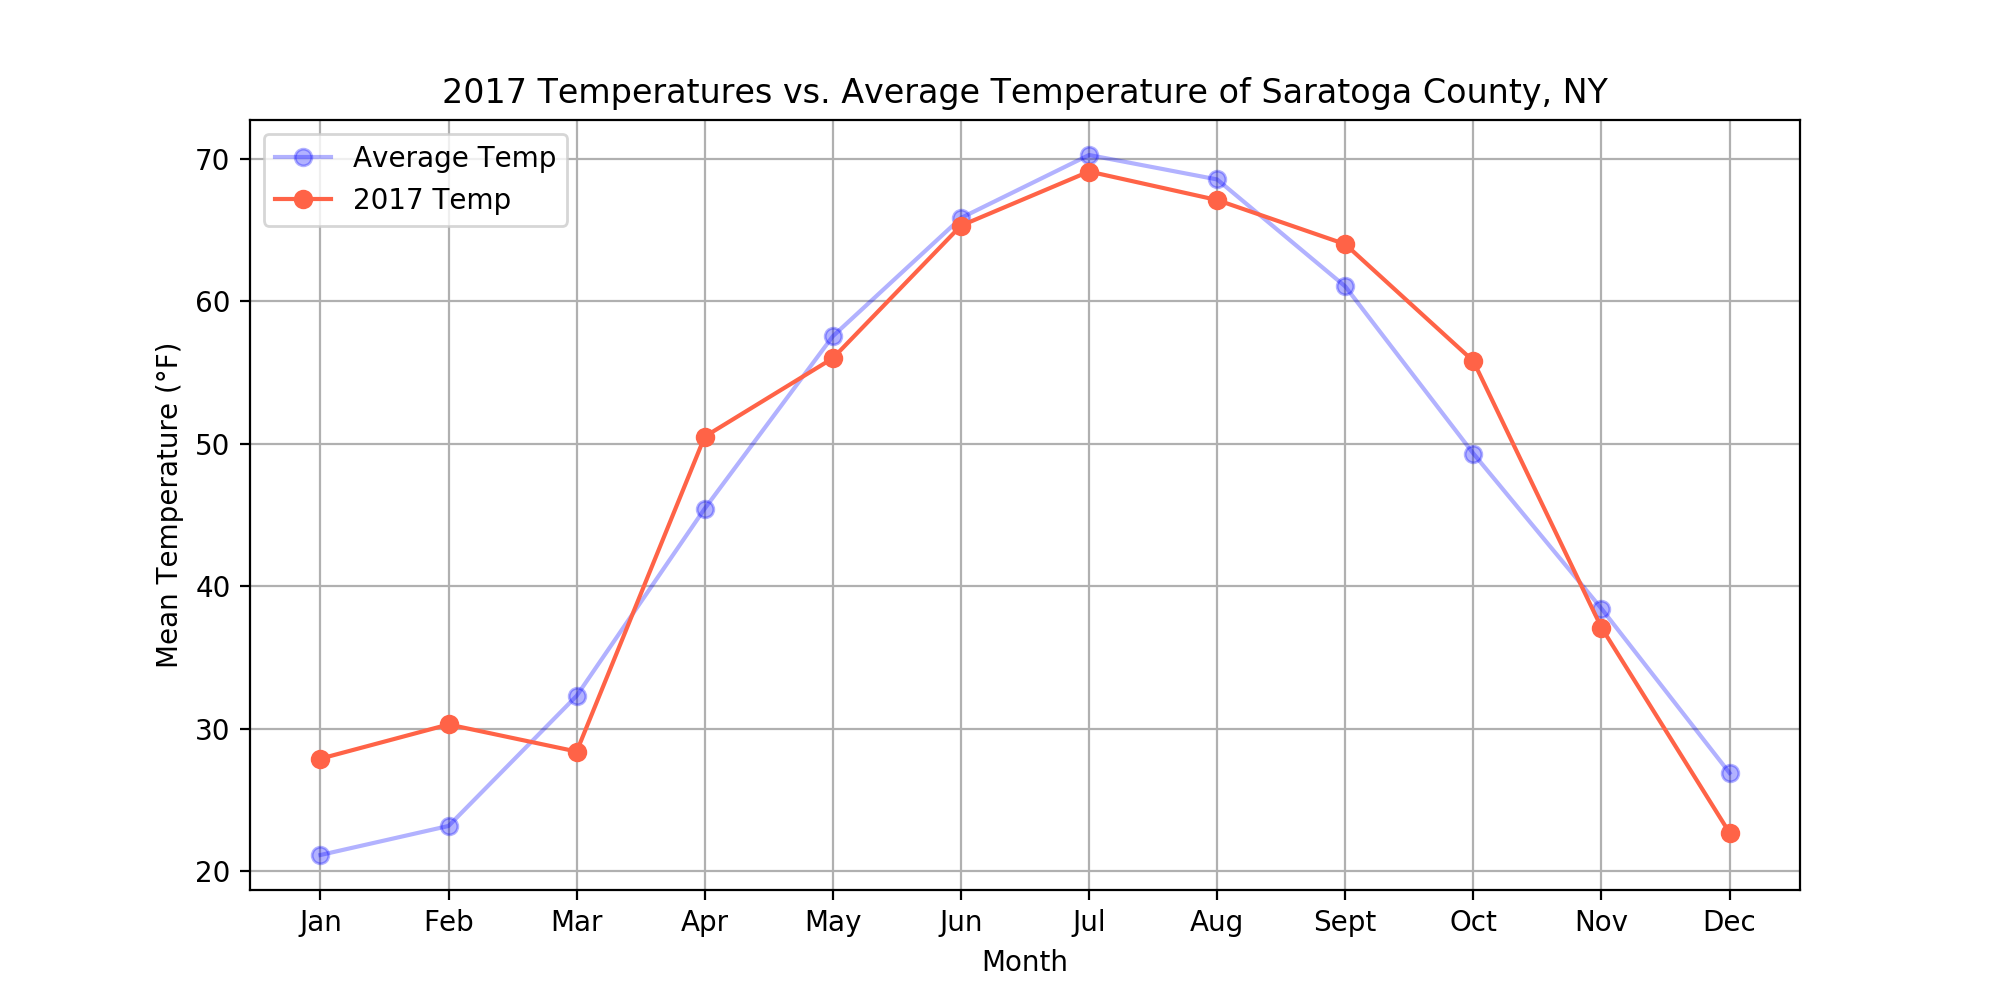

In [12]:
dr_currentyear2017 = saratoga_temp_ppt_1993_df[saratoga_temp_ppt_1993_df.Year=="2017"]
dr_currentyear2017.reset_index(inplace = True) 
dr_currentyear2017

x3=df_temp['Month']
y3=df_temp['Overall_MeanTemp']
y4=dr_currentyear2017['tempmeanF']
fig = plt.figure(figsize=(10,5))

plt.plot(x3, y3,'b',marker='o',label="Average Temp",alpha = .3)
plt.plot(x3, y4,'tomato',marker='o', label="2017 Temp")
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°F)')
plt.title('2017 Temperatures vs. Average Temperature of Saratoga County, NY')
plt.subplots_adjust(top=.88)
plt.grid(True)
plt.savefig('Charts/Saratoga_Avg_vs_2017_temps-LIVE.png')
plt.show()
#End growing season (last harvest) Oct/Nov
#20 year increments